In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import KernelDensity
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [ ]:
url1 = "https://archive.ics.uci.edu/ml/machine-learning-databases/image/segmentation.data"
url2 = "https://archive.ics.uci.edu/ml/machine-learning-databases/image/segmentation.test"

In [ ]:
cols = ["CLASS", "REGION-CENTROID-COL", "REGION-CENTROID-ROW", "REGION-PIXEL-COUNT", "SHORT-LINE-DENSITY-5", "SHORT-LINE-DENSITY-2", "VEDGE-MEAN", "VEDGE-SD", "HEDGE-MEAN", "HEDGE-SD", "INTENSITY-MEAN","RAWRED-MEAN","RAWBLUE-MEAN","RAWGREEN-MEAN","EXRED-MEAN","EXBLUE-MEAN","EXGREEN-MEAN","VALUE-MEAN","SATURATION-MEAN","HUE-MEAN"]

In [ ]:
data1 = pd.read_csv(url1, header=2, names=cols)
data2 = pd.read_csv(url2, header=2, names=cols)
data = pd.concat([data1, data2])

In [ ]:
X1 = data.iloc[:, 4:9]
X2 = data.iloc[:, 10:20]
X3 = data.drop(["CLASS", "REGION-CENTROID-COL", "REGION-CENTROID-ROW", "REGION-PIXEL-COUNT"], axis=1)
Y = data["CLASS"]

In [ ]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y, test_size=0.2, random_state=1212)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y, test_size=0.2, random_state=1212)
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y, test_size=0.2, random_state=1212)

# KNN

## Treinamento para dataset 1

Melhor valor de k:  42
Acurácia com melhor k:  0.4653679653679654


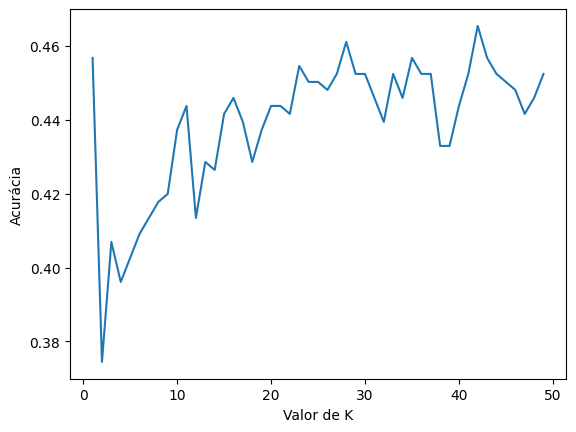

In [ ]:
neighborhood = range(1,50)
scores = {}
scores_list = []

for n in neighborhood:
    knn = KNeighborsClassifier(n_neighbors=n, p=2)
    knn.fit(X1_train, Y1_train)
    y_pred = knn.predict(X1_test)
    scores[n] = accuracy_score(Y1_test,y_pred)
    scores_list.append(accuracy_score(Y1_test,y_pred))

plt.plot(neighborhood, scores_list)
plt.xlabel('Valor de K')
plt.ylabel('Acurácia')
melhor_k_1 = scores_list.index(max(scores_list))
print("Melhor valor de k: ", melhor_k_1 + 1)
print("Acurácia com melhor k: ", max(scores_list))
    

## Treinamento para dataset 2

Melhor valor de k:  1
Acurácia com melhor k:  0.9047619047619048


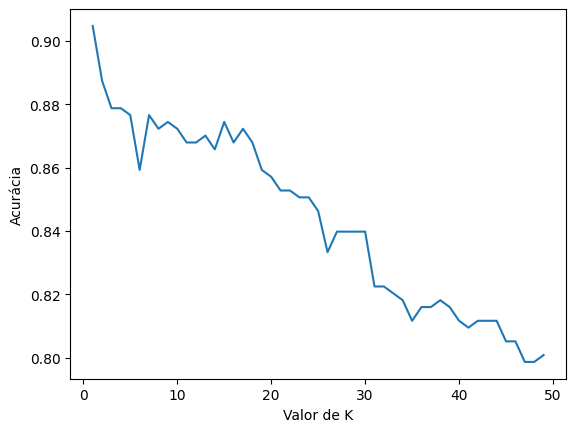

In [ ]:
scores = {}
scores_list = []

for n in neighborhood:
    knn = KNeighborsClassifier(n_neighbors=n, p=2)
    knn.fit(X2_train, Y2_train)
    y_pred = knn.predict(X2_test)
    scores[n] = accuracy_score(Y2_test,y_pred)
    scores_list.append(accuracy_score(Y2_test,y_pred))

plt.plot(neighborhood,scores_list)
plt.xlabel('Valor de K')
plt.ylabel('Acurácia')
melhor_k_2 = scores_list.index(max(scores_list))
print("Melhor valor de k: ", melhor_k_2 + 1)
print("Acurácia com melhor k: ", max(scores_list))

## Treinamento para dataset 3

Melhor valor de k:  1
Acurácia com melhor k:  0.9307359307359307


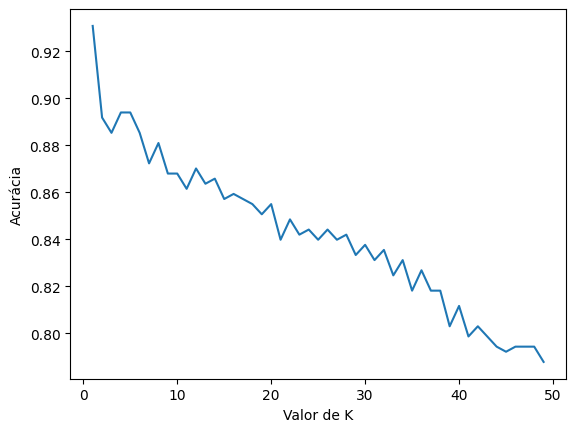

In [ ]:
scores = {}
scores_list = []

for n in neighborhood:
    knn = KNeighborsClassifier(n_neighbors=n, p=2)
    knn.fit(X3_train, Y3_train)
    y_pred = knn.predict(X3_test)
    scores[n] = accuracy_score(Y3_test,y_pred)
    scores_list.append(accuracy_score(Y3_test,y_pred))

plt.plot(neighborhood,scores_list)
plt.xlabel('Valor de K')
plt.ylabel('Acurácia')
melhor_k_3 = scores_list.index(max(scores_list))
print("Melhor valor de k: ", melhor_k_3 + 1)
print("Acurácia com melhor k: ", max(scores_list))

## Classificador com voto majoritário

In [ ]:
def voting_knn(k_dataset1, k_dataset2, k_dataset3):
  knn1 = KNeighborsClassifier(n_neighbors=k_dataset1 + 1, p=2)
  knn1.fit(X1_train, Y1_train)
  y_pred1 = knn1.predict(X1_test)
  acc_1 = accuracy_score(Y1_test,y_pred1)

  knn2 = KNeighborsClassifier(n_neighbors=k_dataset2 + 1, p=2)
  knn2.fit(X2_train, Y2_train)
  y_pred2 = knn2.predict(X2_test)
  acc_2 = accuracy_score(Y2_test,y_pred2)

  knn3 = KNeighborsClassifier(n_neighbors=k_dataset3 + 1, p=2)
  knn3.fit(X3_train, Y3_train)
  y_pred3 = knn3.predict(X3_test)
  acc_3 = accuracy_score(Y3_test,y_pred3)

  voted = ''
  if acc_1 > acc_2 and acc_1 > acc_3:
    voted = 'dataset 1'
  elif acc_2 > acc_1 and acc_2 > acc_3:
    voted = 'dataset 2'
  else:
    voted = 'dataset 3'

  classifiers = [acc_1, acc_2, acc_3]

  return voted, classifiers

In [ ]:
final_result = voting_knn(melhor_k_1, melhor_k_2, melhor_k_3)

In [ ]:
final_result

('dataset 3', [0.4653679653679654, 0.9047619047619048, 0.9307359307359307])

# Janela de Parzen

## Função auxiliar de predição

In [ ]:
def realizar_predicoes(modelo, x_test, y_test):
  dict_acerto_e_erros = {}
  array_predicoes = [''] * len(x_test)

  x = x_test.values
  y = y_test.values

  i = 0
  for observacao in x:
    indice, valor = modelo.predict(observacao)
    if (valor == y[i]):
      dict_acerto_e_erros[i] = {"resultado":"ACERTOU", "predicao":valor, "valor_correto":y[i]}
      array_predicoes[i] = valor
    else:
      dict_acerto_e_erros[i] = {"resultado":"ERROU", "predicao":valor, "valor_correto":y[i]}
      array_predicoes[i] = valor
    
    i = i + 1

  return array_predicoes, dict_acerto_e_erros

In [ ]:
# Classificador Bayesiano com função densidade baseada em Janela de Pazen.

class ClassificadorBayesianoParzen:

  def fit(self, X, Y, h):
    self.dict_apriori = {}
    self.X = X
    self.h = h
    self.Y = Y
    self.numero_de_classes = len(Y.drop_duplicates())
    self.apriori = self.calcular_probabilidade_apriori(X, Y)
    self.dict_classes = {}
    label_classes = Y.drop_duplicates().values

    m = 0
    for label in label_classes:
      self.dict_classes[m] = label
      m = m + 1

  def calcular_probabilidade_apriori(self, X, Y):
    X['CLASSE'] = Y
    classes = Y.drop_duplicates()
    apriori = [0.0] * len(classes)

    i = 0
    for classe in classes:
      apriori[i] = len(X[X[X.columns[-1]] == classe])/len(X)
      self.dict_apriori[i] = apriori[i]
      i =  i + 1

    return apriori

  # x_k é um vetor de d-dimensoes que se deseja calcular a função, w_i é índice da classe (primeira, segunda etc.)
  def calcular_funcao_probabilidade(self, x_k, w_i):
    X = self.X 
    X['CLASSE'] = self.Y
    kde = KernelDensity(kernel='gaussian', bandwidth=self.h)
    dados_da_classe = X[X[X.columns[-1]] == self.dict_classes[w_i]].drop(['CLASSE'], axis=1)
    kde.fit(dados_da_classe)
    probabilidade = np.exp(kde.score_samples(x_k.reshape(1, -1)))
    
    return probabilidade

  def predict(self, x_k):
    probabilidades = [0.0] * self.numero_de_classes

    i = 0
    for classe in self.dict_classes:
      prob_condicional = self.calcular_funcao_probabilidade(x_k, classe)
      probabilidades[i] = prob_condicional * self.apriori[i]
      i = i + 1

    evidencia = np.sum(probabilidades)

    return probabilidades.index(max(probabilidades)), self.dict_classes[probabilidades.index(max(probabilidades))]


## Dataset 1

In [ ]:
possiveis_h1 = np.linspace(0.05,0.1,10)
acuracias1 = []

for h in possiveis_h1:
  cbp = ClassificadorBayesianoParzen()
  cbp.fit(X1_train, Y1_train, h)
  array_predicoes, dict_predicoes = realizar_predicoes(cbp, X1_test, Y1_test)
  metricas = metrics.classification_report(Y1_test, array_predicoes, digits=3)

  acuracias1.append(metrics.accuracy_score(Y1_test, array_predicoes))

A saída de streaming foi truncada nas últimas 5000 linhas.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: 

In [ ]:
acuracias1

[0.44805194805194803,
 0.45021645021645024,
 0.45454545454545453,
 0.4458874458874459,
 0.44155844155844154,
 0.4458874458874459,
 0.43506493506493504,
 0.43722943722943725,
 0.44155844155844154,
 0.4393939393939394]

Melhor valor de h:  0.061111111111111116
Acurácia com melhor h:  0.45454545454545453


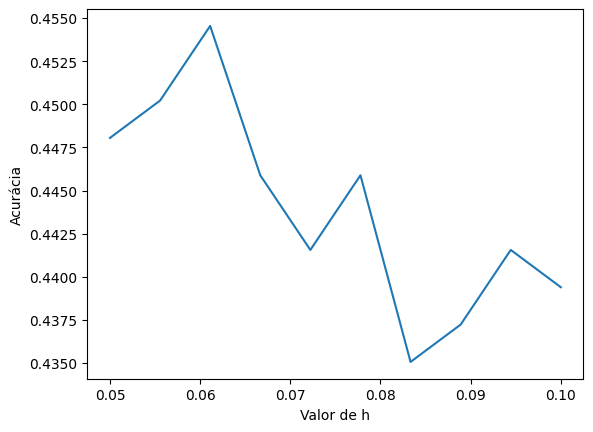

In [ ]:
plt.plot(possiveis_h1,acuracias1)
plt.xlabel('Valor de h')
plt.ylabel('Acurácia')
melhor_h_1 = possiveis_h1[acuracias1.index(max(acuracias1))]
print("Melhor valor de h: ", melhor_h_1)
print("Acurácia com melhor h: ", max(acuracias1))

## Dataset 2

In [ ]:
possiveis_h2 = np.linspace(0.05,0.1,10)
acuracias2 = []

for h in possiveis_h2:
  cbp = ClassificadorBayesianoParzen()
  cbp.fit(X2_train, Y2_train, h)
  array_predicoes, dict_predicoes = realizar_predicoes(cbp, X2_test, Y2_test)
  metricas = metrics.classification_report(Y2_test, array_predicoes, digits=3)

  acuracias2.append(metrics.accuracy_score(Y2_test, array_predicoes))

A saída de streaming foi truncada nas últimas 5000 linhas.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: 

In [ ]:
acuracias2

[0.7878787878787878,
 0.8073593073593074,
 0.8333333333333334,
 0.8463203463203464,
 0.8593073593073594,
 0.8679653679653679,
 0.8658008658008658,
 0.8744588744588745,
 0.8744588744588745,
 0.8809523809523809]

Melhor valor de h:  0.1
Acurácia com melhor h:  0.8809523809523809


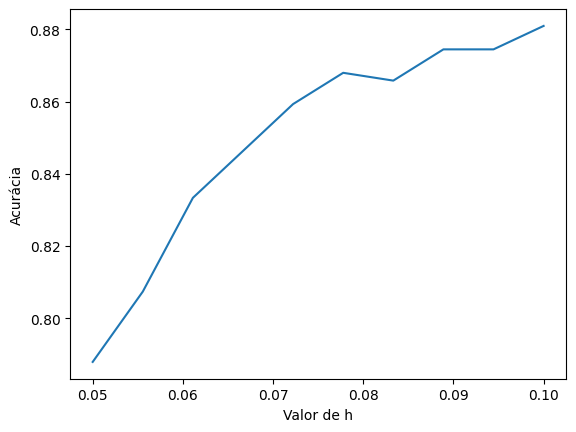

In [ ]:
plt.plot(possiveis_h2,acuracias2)
plt.xlabel('Valor de h')
plt.ylabel('Acurácia')
melhor_h_2 = possiveis_h2[acuracias2.index(max(acuracias2))]
print("Melhor valor de h: ", melhor_h_2)
print("Acurácia com melhor h: ", max(acuracias2))

## Dataset 3

In [ ]:
possiveis_h3 = np.linspace(0.05,0.1,10)
acuracias3 = []

for h in possiveis_h3:
  cbp = ClassificadorBayesianoParzen()
  cbp.fit(X3_train, Y3_train, h)
  array_predicoes, dict_predicoes = realizar_predicoes(cbp, X3_test, Y3_test)
  metricas = metrics.classification_report(Y3_test, array_predicoes, digits=3)

  acuracias3.append(metrics.accuracy_score(Y3_test, array_predicoes))

A saída de streaming foi truncada nas últimas 5000 linhas.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: 

In [ ]:
acuracias3

[0.6168831168831169,
 0.6471861471861472,
 0.6796536796536796,
 0.7034632034632035,
 0.696969696969697,
 0.7337662337662337,
 0.7467532467532467,
 0.7554112554112554,
 0.7640692640692641,
 0.7510822510822511]

Melhor valor de h:  0.09444444444444444
Acurácia com melhor h:  0.7640692640692641


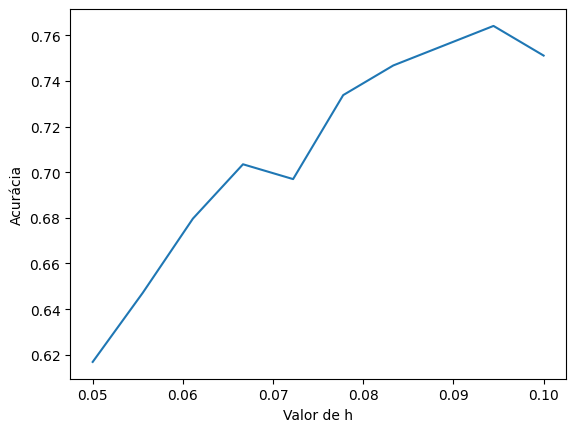

In [ ]:
plt.plot(possiveis_h3,acuracias3)
plt.xlabel('Valor de h')
plt.ylabel('Acurácia')
melhor_h_3 = possiveis_h3[acuracias3.index(max(acuracias3))]
print("Melhor valor de h: ", melhor_h_3)
print("Acurácia com melhor h: ", max(acuracias3))

## Classificador com voto majoritário

In [ ]:
def voting_parzen(h_dataset1, h_dataset2, h_dataset3):
  cbp = ClassificadorBayesianoParzen()
  cbp.fit(X1_train, Y1_train, h_dataset1)
  array_predicoes, dict_predicoes = realizar_predicoes(cbp, X1_test, Y1_test)
  metricas = metrics.classification_report(Y1_test, array_predicoes, digits=3)
  acc_1 = metrics.accuracy_score(Y1_test, array_predicoes)

  cbp = ClassificadorBayesianoParzen()
  cbp.fit(X2_train, Y2_train, h_dataset2)
  array_predicoes, dict_predicoes = realizar_predicoes(cbp, X2_test, Y2_test)
  metricas = metrics.classification_report(Y2_test, array_predicoes, digits=3)
  acc_2 = metrics.accuracy_score(Y2_test, array_predicoes)

  cbp = ClassificadorBayesianoParzen()
  cbp.fit(X3_train, Y3_train, h_dataset3)
  array_predicoes, dict_predicoes = realizar_predicoes(cbp, X3_test, Y3_test)
  metricas = metrics.classification_report(Y3_test, array_predicoes, digits=3)
  acc_3 = metrics.accuracy_score(Y3_test, array_predicoes)

  voted = ''
  if acc_1 > acc_2 and acc_1 > acc_3:
    voted = 'dataset 1'
  elif acc_2 > acc_1 and acc_2 > acc_3:
    voted = 'dataset 2'
  else:
    voted = 'dataset 3'

  classifiers = [acc_1, acc_2, acc_3]

  return voted, classifiers

In [ ]:
final_result = voting_parzen(melhor_h_1, melhor_h_2, melhor_h_3)

A saída de streaming foi truncada nas últimas 5000 linhas.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: 

In [ ]:
final_result

('dataset 2', [0.45454545454545453, 0.8809523809523809, 0.7640692640692641])